In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 변수들을 정의하자
# 시간
t0 = 0 # 시작시간
tf = 15 # 끝시간
n = 150 # 격자 개수 
h = (tf-t0) / n # 격자 간격(0 ~ 1000까지 10000개로 나누기)
time = np.linspace(t0, tf, n+1) # 시작점, 끝점, 점의 개수(간격수 + 1)의 3가지 변수로 벡터를 생성할 수 있다.
#               행렬생성
#                            S        E     I    R
initial_value = np.array([51839994.0, 0.0, 6.0, 0.0])
# [S, I, R] S = N(전체 인구수 - I(감염된 인구수)) 감염될 인구수
x = np.array((n+1)*[initial_value])
#           초기값(1*3행렬)을 n+1시간 개수만큼 행방향 생성(결국(n+1)*3 행렬)
# 나머지 변수
N = 51840000
alpha = 1/5 # 잠복기
beta = 0.4 # 감염상수
gamma = 1/14 # 회복률
delta = 1/229 # 1/재감염 평균일수

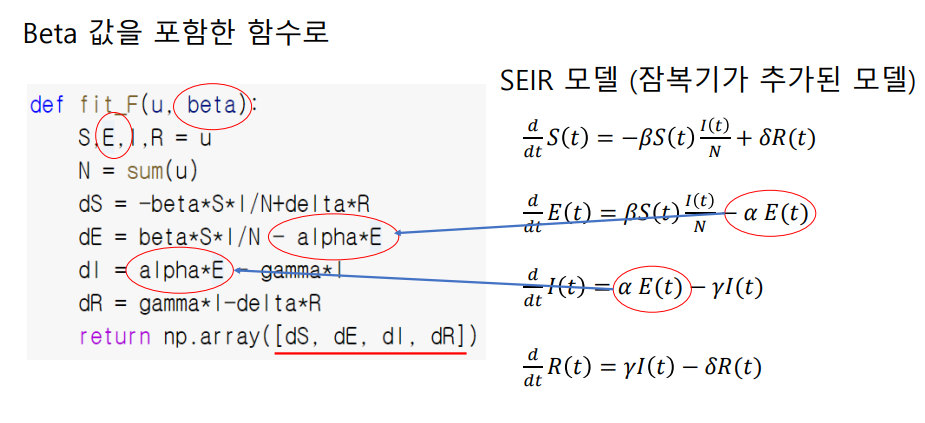

In [3]:
def fit_F(u, beta): 
    S, E, I, R = u # u = x[i] 
    N = sum(u)
    dS = -beta * S * I/N + delta * R
    dE = beta * S * I/N - alpha * E
    dI = alpha * E - gamma * I
    dR = gamma * I - delta * R
    return np.array([dS, dE, dI, dR])

In [4]:
def rk4(fit_F, initial_value, t0, tf, n, beta):
    time = np.linspace(t0, tf, n+1)
    x = np.array((n+1)*[initial_value])
    h = time[1] - time[0]
    for i in range(n):
        k0 = fit_F(x[i], beta) # f(x[0]) => f(51839994, 6, 0)
        k1 = fit_F(x[i] + 0.5 * k0 * h, beta)
        k2 = fit_F(x[i] + 0.5 * k1 * h, beta)
        k3 = fit_F(x[i] + k2 * h, beta)
        x[i+1] = x[i] + h * (k0 + 2 * (k1 + k2) + k3) / 6
    return time, x

In [5]:
N_time, N_x = rk4(fit_F, initial_value, t0, tf, n, 1)

In [6]:
# pd.read_excel로 xlsx파일 불러오기
data = pd.read_excel('Cases(COVID-19)_test1.xlsx')
data

,date,cases
0,2020-08-01,6
1,2020-08-02,6
2,2020-08-03,15
3,2020-08-04,14
4,2020-08-05,22
5,2020-08-06,19
6,2020-08-07,34
7,2020-08-08,17
8,2020-08-09,17
9,2020-08-10,29


In [7]:
data_y = data.loc[0:15, 'cases']
data_y

0       6
1       6
2      15
3      14
4      22
5      19
6      34
7      17
8      17
9      29
10     45
11     55
12    142
13    272
14    178
15    202
Name: cases, dtype: int64

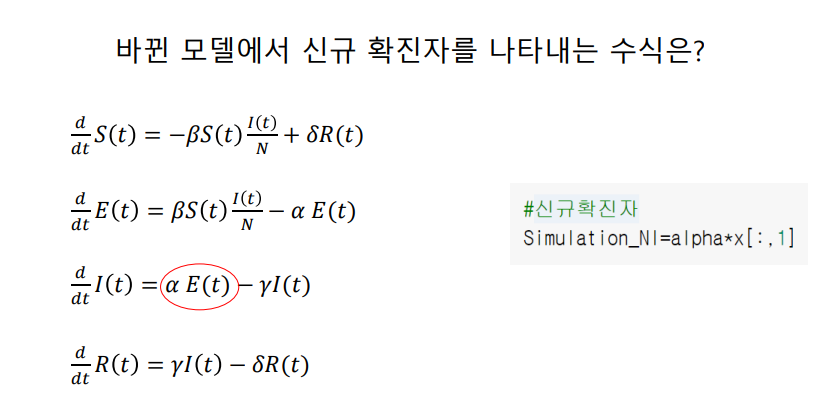

In [8]:
N_x[:, 1]

array([0.00000000e+00, 5.92113438e-01, 1.16945640e+00, 1.73348234e+00,
       2.28558143e+00, 2.82708472e+00, 3.35926823e+00, 3.88335672e+00,
       4.40052732e+00, 4.91191296e+00, 5.41860564e+00, 5.92165952e+00,
       6.42209385e+00, 6.92089579e+00, 7.41902310e+00, 7.91740662e+00,
       8.41695276e+00, 8.91854578e+00, 9.42305000e+00, 9.93131195e+00,
       1.04441624e+01, 1.09624182e+01, 1.14868843e+01, 1.20183554e+01,
       1.25576179e+01, 1.31054514e+01, 1.36626301e+01, 1.42299248e+01,
       1.48081042e+01, 1.53979363e+01, 1.60001899e+01, 1.66156360e+01,
       1.72450490e+01, 1.78892084e+01, 1.85488996e+01, 1.92249156e+01,
       1.99180581e+01, 2.06291384e+01, 2.13589794e+01, 2.21084161e+01,
       2.28782969e+01, 2.36694853e+01, 2.44828604e+01, 2.53193187e+01,
       2.61797748e+01, 2.70651627e+01, 2.79764374e+01, 2.89145754e+01,
       2.98805765e+01, 3.08754647e+01, 3.19002897e+01, 3.29561276e+01,
       3.40440828e+01, 3.51652888e+01, 3.63209099e+01, 3.75121421e+01,
      

In [9]:
# 신규확진자
Simulation_NI = alpha * N_x[:,1]

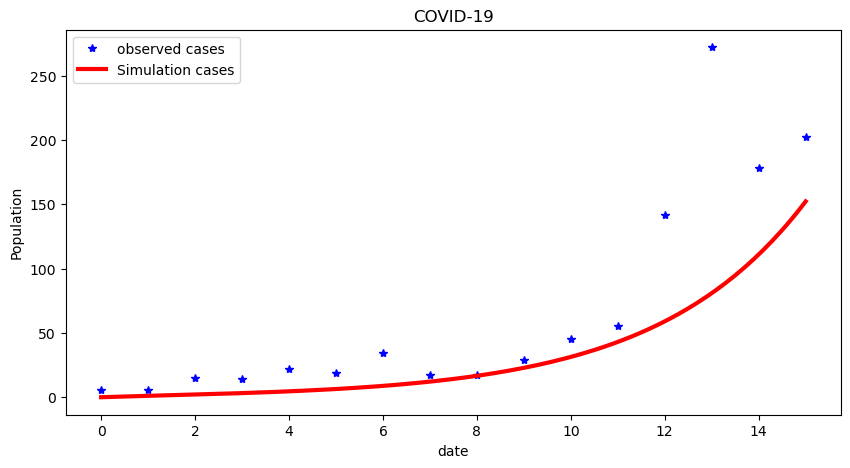

In [10]:
plt.figure(figsize = (10, 5)) # 그림 크기 설정
t1 = data.index[0:16]
t2 = time
y1 = data_y 
y2 = Simulation_NI
lines = plt.plot(t1, y1, '*b', t2, y2, 'r')
#                   색 설정 red  색 설정 green
plt.setp(lines[0], linewidth = 3) # 그림 셋업
plt.setp(lines[1], linewidth = 3)
plt.xlabel('date') # x라벨
plt.ylabel('Population') # y라벨
plt.legend(('observed cases', 'Simulation cases'), fontsize = 10, loc = 'best') 
#                                  best = 적정위치에 알아서 upper right = 오른쪽 위에(범례설정)
plt.title('COVID-19') # 제목
plt.show()

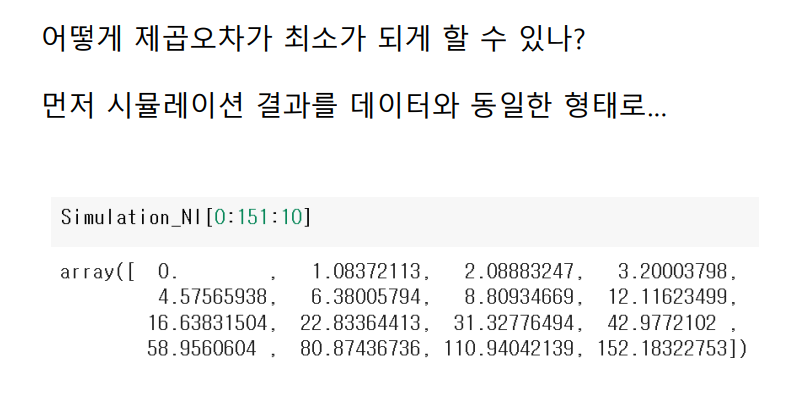

In [11]:
Simulation_NI[0:n+1:10] # 0부터 150까지 10간격으로 배열 가져오기

array([  0.        ,   1.08372113,   2.08883247,   3.20003798,
         4.57565938,   6.38005794,   8.80934669,  12.11623499,
        16.63831504,  22.83364413,  31.32776494,  42.9772102 ,
        58.9560604 ,  80.87436736, 110.94042139, 152.18322753])

In [12]:
data_y

0       6
1       6
2      15
3      14
4      22
5      19
6      34
7      17
8      17
9      29
10     45
11     55
12    142
13    272
14    178
15    202
Name: cases, dtype: int64

In [13]:
diff = data_y - Simulation_NI[0:151:10]
diff

0       6.000000
1       4.916279
2      12.911168
3      10.799962
4      17.424341
5      12.619942
6      25.190653
7       4.883765
8       0.361685
9       6.166356
10     13.672235
11     12.022790
12     83.043940
13    191.125633
14     67.059579
15     49.816772
Name: cases, dtype: float64

In [14]:
# np.dot는 파이썬에서 내적을 의미
MSE = np.dot(diff, diff) / len(diff)

In [15]:
MSE

3264.901968116059

In [16]:
def diff_F(data_y, initial_value, t0, tf, n, x2):
    time, SIR_t = rk4(fit_F, initial_value, t0, tf, n, x2)
    # 신규확진자
    Simulation_NI = alpha * SIR_t[:, 1]
    diff = data_y - Simulation_NI[0:n+1:int(1/h)]
    MSE = np.dot(diff, diff) / len(diff) # 평균제곱오차
    return MSE

In [17]:
diff_F(data_y, initial_value, t0, tf, n, 1)

3264.901968116059

In [18]:
error_val = 10
val = 0.1
DPL = 0

In [19]:
old_beta = 0.1
old_result = diff_F(data_y, initial_value, t0, tf, n, old_beta)
New_beta = old_beta + (-1) ** (DPL) * val
New_result = diff_F(data_y, initial_value, t0, tf, n, New_beta)
while error_val > 0.001:
    if New_result < old_result:
        old_result = New_result
        old_beta = New_beta
        New_beta = old_beta + (-1) ** (DPL) * val
        New_result = diff_F(data_y, initial_value, t0, tf, n, New_beta)
    
    else:
        old_result = New_result
        old_beta = New_beta
        val = val/2
        DPL = DPL+1
        New_beta = old_beta + (-1) ** (DPL) * val
        New_result = diff_F(data_y, initial_value, t0, tf, n, New_beta)
    error_val = abs(old_result - New_result) 

In [20]:
New_beta

1.1535156249999998

In [21]:
New_result

1711.9634192492056

In [22]:
N_time, N_x = rk4(fit_F, initial_value, t0, tf, n, New_beta)

In [23]:
Simulation_NI = alpha * N_x[:, 1]

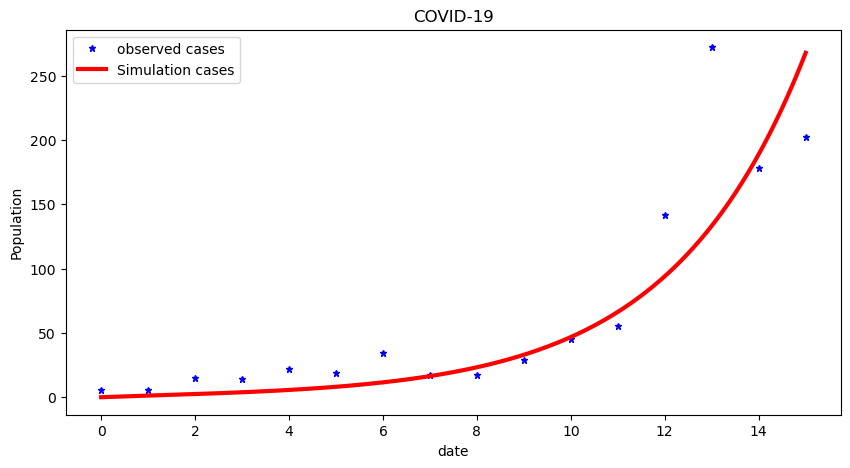

In [24]:
plt.figure(figsize = (10, 5)) # 그림 크기 설정
t1 = data.index[0:16]
t2 = N_time
y1 = data_y 
y2 = Simulation_NI
lines = plt.plot(t1, y1, '*b', t2, y2, 'r')
#                   색 설정 red  색 설정 green
plt.setp(lines[0], markersize = 5) # 그림 셋업
plt.setp(lines[1], linewidth = 3)
plt.xlabel('date') # x라벨
plt.ylabel('Population') # y라벨
plt.legend(('observed cases', 'Simulation cases'), fontsize = 10, loc = 'best') 
#                                  best = 적정위치에 알아서 upper right = 오른쪽 위에(범례설정)
plt.title('COVID-19') # 제목
plt.show()

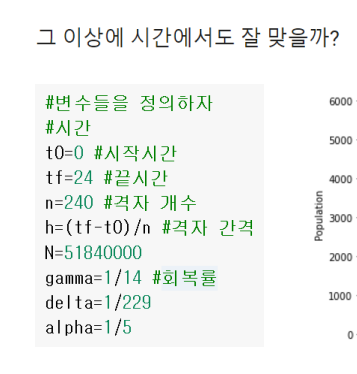

In [25]:
# 변수들을 정의하자
# 시간
t0 = 0 # 시작시간
tf = 24 # 끝시간
n = 240 # 격자 개수 
h = (tf-t0) / n # 격자 간격(0 ~ 1000까지 10000개로 나누기)
N = 51840000
alpha = 1/5 # 잠복기
gamma = 1/14 # 회복률
delta = 1/229 # 1/재감염 평균일수

In [26]:
def fit_F(u, beta): 
    S, E, I, R = u # u = x[i] 
    N = sum(u)
    dS = -beta * S * I/N + delta * R
    dE = beta * S * I/N - alpha * E
    dI = alpha * E - gamma * I
    dR = gamma * I - delta * R
    return np.array([dS, dE, dI, dR])

In [27]:
def rk4(fit_F, initial_value, t0, tf, n, beta):
    time = np.linspace(t0, tf, n+1)
    x = np.array((n+1)*[initial_value])
    h = time[1] - time[0]
    for i in range(n):
        k0 = fit_F(x[i], beta) # f(x[0]) => f(51839994, 6, 0)
        k1 = fit_F(x[i] + 0.5 * k0 * h, beta)
        k2 = fit_F(x[i] + 0.5 * k1 * h, beta)
        k3 = fit_F(x[i] + k2 * h, beta)
        x[i+1] = x[i] + h * (k0 + 2 * (k1 + k2) + k3) / 6
    return time, x

In [28]:
data_y = data.loc[0:24, 'cases']
data_y

0       6
1       6
2      15
3      14
4      22
5      19
6      34
7      17
8      17
9      29
10     45
11     55
12    142
13    272
14    178
15    202
16    293
17    301
18    317
19    324
20    341
21    334
22    214
23    332
24    416
Name: cases, dtype: int64

In [29]:
N_time, N_x = rk4(fit_F, initial_value, t0, tf, n, New_beta)

In [30]:
Simulation_NI = alpha * N_x[:, 1]

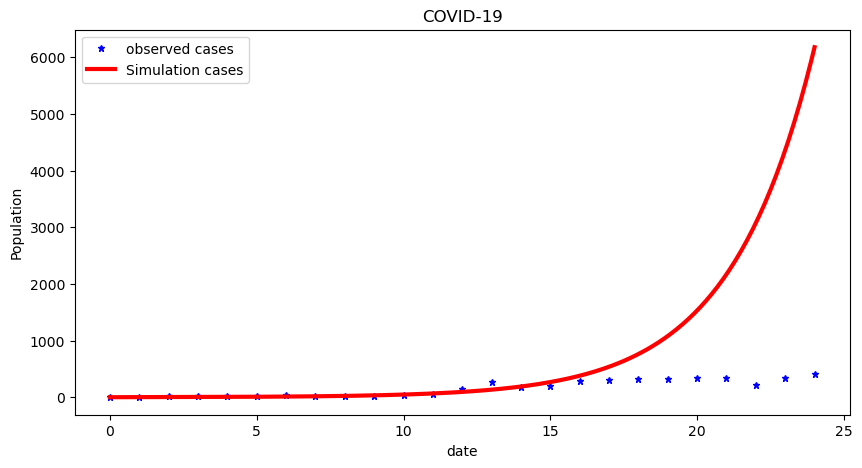

In [31]:
plt.figure(figsize = (10, 5)) # 그림 크기 설정
t1 = data.index[0:25]
t2 = N_time
y1 = data_y 
y2 = Simulation_NI
lines = plt.plot(t1, y1, '*b', t2, y2, 'r')
#                   색 설정 red  색 설정 green
plt.setp(lines[0], markersize = 5) # 그림 셋업
plt.setp(lines[1], linewidth = 3)
plt.xlabel('date') # x라벨
plt.ylabel('Population') # y라벨
plt.legend(('observed cases', 'Simulation cases'), fontsize = 10, loc = 'best') 
#                                  best = 적정위치에 알아서 upper right = 오른쪽 위에(범례설정)
plt.title('COVID-19') # 제목
plt.show()

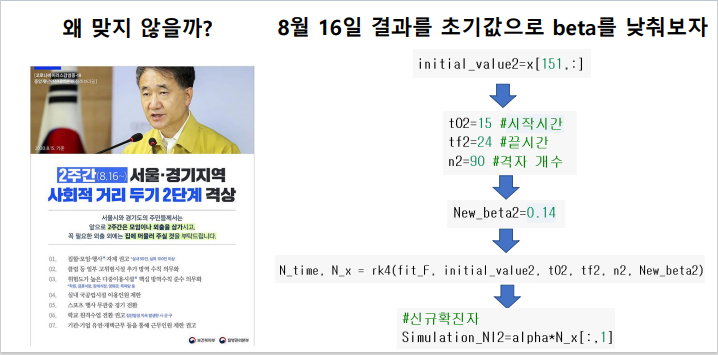

In [32]:
initial_value2 = N_x[151, :]
initial_value2

array([5.18378219e+07, 1.38571963e+03, 6.59387370e+02, 1.32970942e+02])

In [33]:
# 변수들을 정의하자
# 시간
t0 = 0 # 시작시간
t02 = 15
tf = 24 # 끝시간
tf2 = 24
n = 240 # 격자 개수 
n2 = 90
h = (tf-t0) / n # 격자 간격(0 ~ 1000까지 10000개로 나누기)
N = 51840000
alpha = 1/5 # 잠복기
gamma = 1/14 # 회복률
delta = 1/229 # 1/재감염 평균일수
New_beta2 = 0.14

def fit_F(u, beta): 
    S, E, I, R = u # u = x[i] 
    N = sum(u)
    dS = -beta * S * I/N + delta * R
    dE = beta * S * I/N - alpha * E
    dI = alpha * E - gamma * I
    dR = gamma * I - delta * R
    return np.array([dS, dE, dI, dR])

def rk4(fit_F, initial_value, t0, tf, n, beta):
    time = np.linspace(t0, tf, n+1)
    x = np.array((n+1)*[initial_value])
    h = time[1] - time[0]
    for i in range(n):
        k0 = fit_F(x[i], beta) # f(x[0]) => f(51839994, 6, 0)
        k1 = fit_F(x[i] + 0.5 * k0 * h, beta)
        k2 = fit_F(x[i] + 0.5 * k1 * h, beta)
        k3 = fit_F(x[i] + k2 * h, beta)
        x[i+1] = x[i] + h * (k0 + 2 * (k1 + k2) + k3) / 6
    return time, x

data_y = data.loc[0:24, 'cases']
data_y

N_time, N_x = rk4(fit_F, initial_value, t0, tf, n, New_beta)
N_time2, N_x2 = rk4(fit_F, initial_value2, t02, tf2, n2, New_beta2)

Simulation_NI = alpha * N_x[:, 1]
Simulation_NI2 = alpha * N_x2[:, 1]

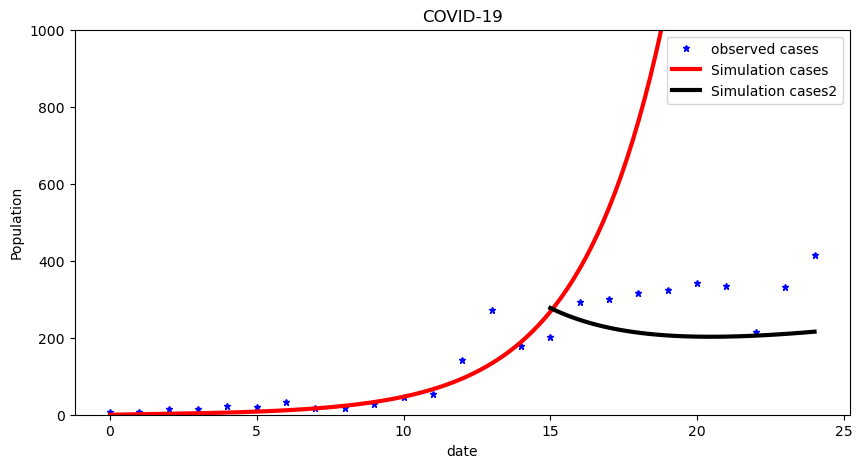

In [34]:
plt.figure(figsize = (10, 5)) # 그림 크기 설정
t1 = data.index
t2 = N_time
t3 = N_time2
y1 = data['cases'] 
y2 = Simulation_NI
y3 = Simulation_NI2
lines = plt.plot(t1, y1, '*b', t2, y2, 'r', t3, y3, 'k')
#                   색 설정 red  색 설정 green
plt.setp(lines[0], markersize = 5) # 그림 셋업
plt.setp(lines[1], linewidth = 3)
plt.setp(lines[2], linewidth = 3)
plt.ylim([0, 1000])
plt.xlabel('date') # x라벨
plt.ylabel('Population') # y라벨
plt.legend(('observed cases', 'Simulation cases', 'Simulation cases2'), fontsize = 10, loc = 'best') 
#                                  best = 적정위치에 알아서 upper right = 오른쪽 위에(범례설정)
plt.title('COVID-19') # 제목
plt.show()